In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Sample text data
documents = [
    "The election results are out",
    "Football teams are practicing",
    "The government announced new policies",
    "The football match was exciting",
    "Election campaigns are ongoing",
    "Sports and politics are often connected"
]

# Labels for the documents (0 = Politics, 1 = Sports)
labels = [0, 1, 0, 1, 0, 1]

# Convert the text data into feature vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize the decision tree
from sklearn.tree import export_text
tree_rules = export_text(clf, feature_names=vectorizer.get_feature_names_out())
print("\nDecision Tree Rules:")
print(tree_rules)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Decision Tree Rules:
|--- often <= 0.50
|   |--- football <= 0.50
|   |   |--- class: 0
|   |--- football >  0.50
|   |   |--- class: 1
|--- often >  0.50
|   |--- class: 1



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        11

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



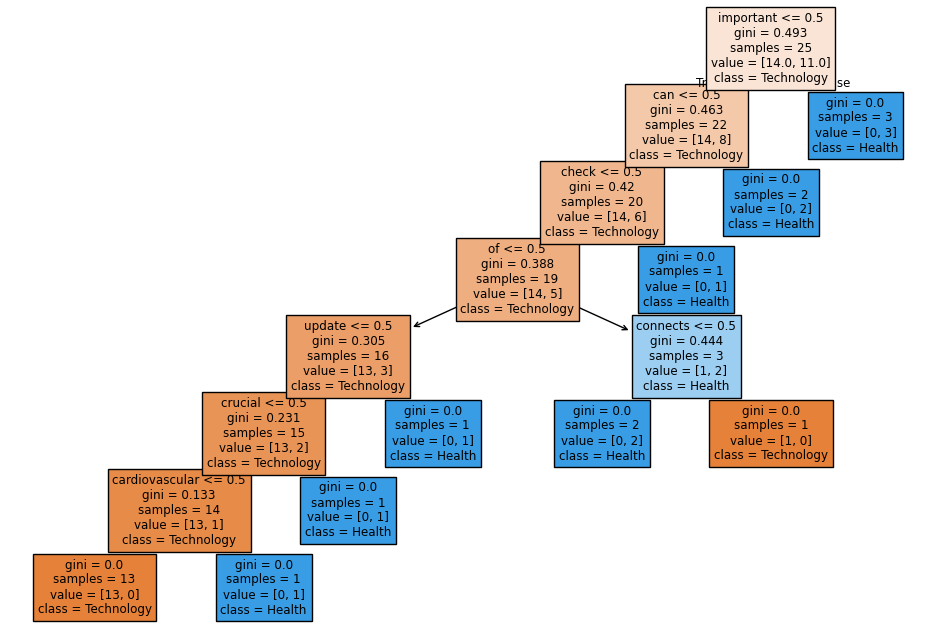

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Sample text data (25 documents: 15 Technology, 10 Health)
documents = [
    "The latest smartphone models have cutting-edge features.",
    "AI is revolutionizing the tech industry with new advancements.",
    "Virtual reality is changing how we experience entertainment.",
    "The new smartwatch offers health tracking features.",
    "Cloud computing enables businesses to scale efficiently.",
    "Tech startups are innovating rapidly in AI and robotics.",
    "Blockchain technology is being used for secure transactions.",
    "The gaming industry is evolving with new gaming consoles.",
    "5G networks will increase internet speed and connectivity.",
    "Self-driving cars are powered by machine learning algorithms.",
    "Quantum computing will solve complex problems faster than ever.",
    "The internet of things connects devices to improve daily life.",
    "Drones are being used for delivery services and surveillance.",
    "Tech giants like Google and Apple are investing in AI.",
    "The new operating system update brings improved security features.",
    "Eating a balanced diet is important for overall health.",
    "Exercise helps to improve cardiovascular health.",
    "Mental health is just as important as physical health.",
    "Doctors recommend regular check-ups for early disease detection.",
    "A good night's sleep is crucial for a healthy lifestyle.",
    "Yoga and meditation can reduce stress levels.",
    "Vaccinations help prevent the spread of infectious diseases.",
    "Herbal remedies are used to treat a variety of ailments.",
    "A plant-based diet can help lower cholesterol levels.",
    "Drinking water regularly is important for staying hydrated."
]

# Corresponding labels (0: Technology, 1: Health)
labels = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# Convert text to a bag-of-words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X, labels)

# Predict the class for the documents
predictions = clf.predict(X)

# Display classification report
print("Classification Report:")
print(classification_report(labels, predictions))

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=vectorizer.get_feature_names_out(), class_names=["Technology", "Health"])
plt.show()
